In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Logistic Regression 
>Today I learned Logistic Regression, and here is my complete understanding in simple words, with examples that make sense in real life.

# What is Logistic Regression?

*Logistic Regression is a machine learning model used when the output is YES/NO, 0/1, True/False, or two categories.*

📌 Examples

* Will a person get diabetes? → Yes or No

* Is an email spam? → Spam or Not Spam

* Will a customer buy the product? → Buy or Not Buy

* Is a tumor cancerous? → Malignant or Benign

So logistic regression is a binary classification algorithm.

Even though the name has “regression”, it is used for classification.

# Before Logistic Regression: Perceptron (The Simplest Classifier)

To understand Logistic Regression, it helps to first understand the Perceptron, which is basically:

✔ A simple linear classifier

✔ Predicts either +1 or -1

✔ Uses a hard threshold (step function)

*How Perceptron works*

Perceptron calculates:

     z=w1​x1​+w2​x2​+⋯+b

Then applies a step function:

> If z > 0 → Class 1
> If z <= 0 → Class 0

📌 Real World Example — Hiring Decision

Imagine a company uses two criteria:

* Experience

* Test Score

And they decide:

> If 2*Experience + 3*TestScore > 50 → Hire  
Else → Don’t hire

This is EXACTLY how a perceptron works.

**❌ But perceptron has a big problem**

*The step function jumps directly from 0 to 1.*

Meaning:

* No probabilities

* No smooth transition

* Cannot say “70% chance” vs “20% chance”

* Cannot differentiate “slightly positive” vs “strongly positive”

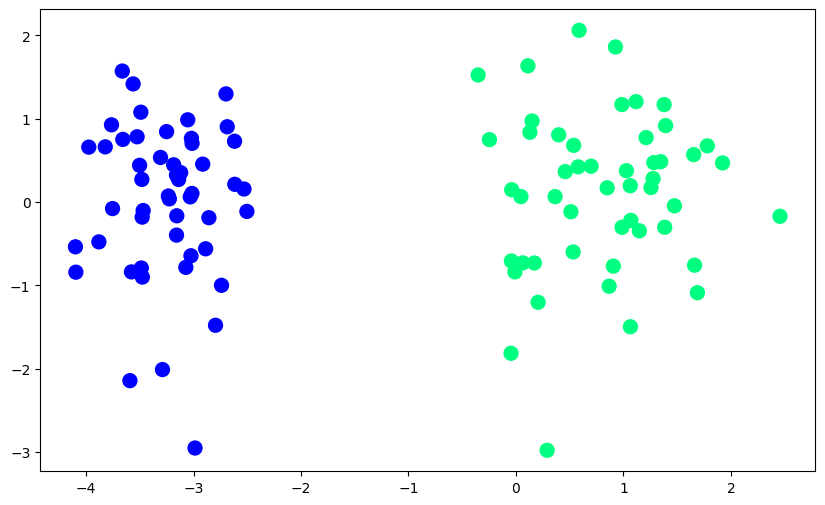

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [3]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights= np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j= np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights= weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [4]:
def step(z):
    return 1 if z>0 else 0

In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print(coef_)
print(intercept_)

[1.05343617 0.2221512 ]
1.3000000000000003


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

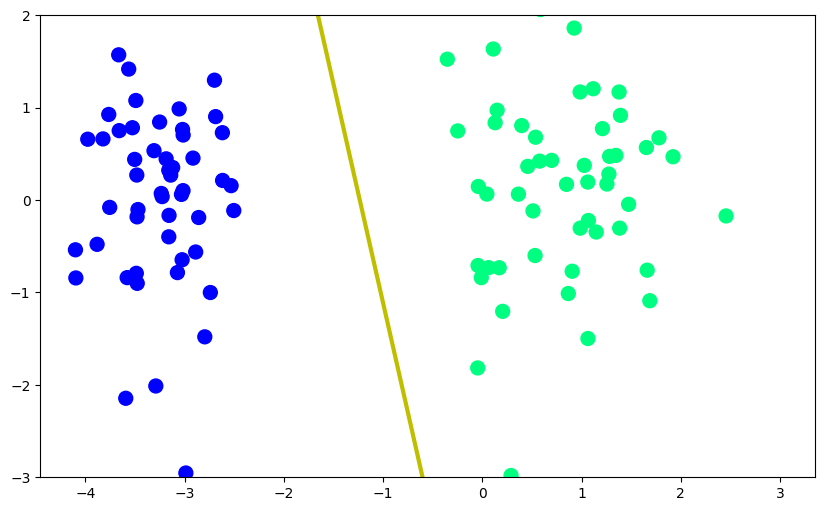

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='y',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(-3.0, 2.0)

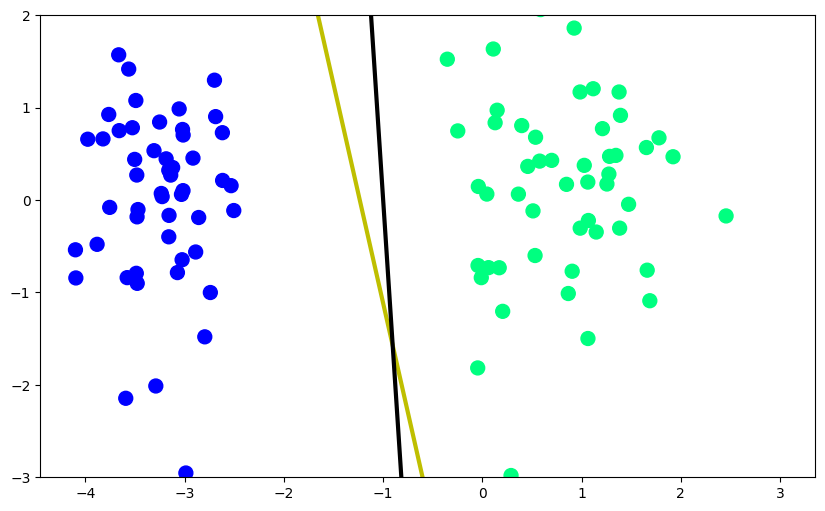

In [9]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty ='none',solver='sag')
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 =( m*x_input1 + b)

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='y',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Why do we need Sigmoid instead of Perceptron?

The perceptron outputs:

     0 or 1

But in real life we want probabilities.

📌 Examples:

* 0.90 chance of cancer vs 0.10 is a big difference

* 0.75 chance someone will click an ad

* 0.20 chance of loan default

A step function can’t give these smooth values.

✔ Sigmoid fixes this.

# Sigmoid Function (The Heart of Logistic Regression)

Sigmoid converts any number into a value between 0 and 1.

          σ(z)=1/1+e−z1

It smoothly increases from 0 → 1 (unlike perceptron jump).

📌 Example

>If a student’s study hours & attendance produce:

         z = 2.3


>Sigmoid gives:

>sigmoid(2.3) = 0.91 → 91% chance to pass

This helps make better decisions.

In [10]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights= np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j= np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights= weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [11]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

In [12]:
intercept_,coef_ = perceptron(X,y)

(-3.0, 2.0)

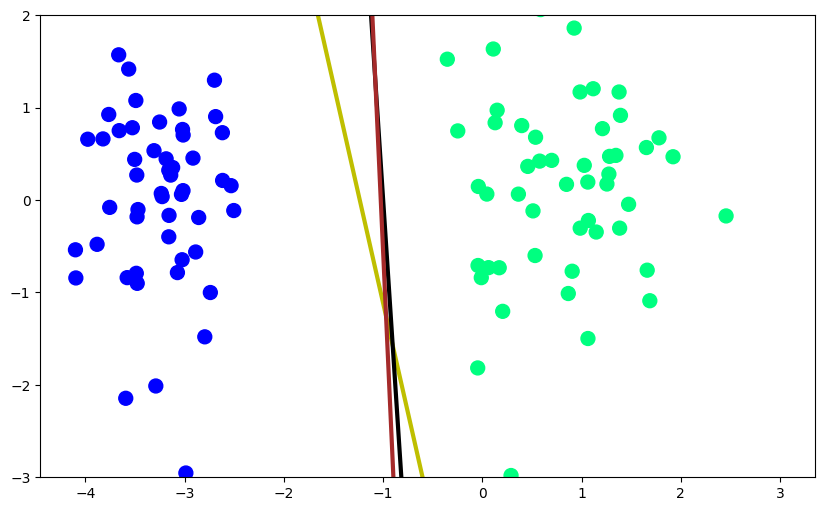

In [13]:

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='y',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Loss function:

**1. The Need for a Loss Function**

We use machine learning to find the best possible solution, not just a solution. Earlier classification methods sometimes found solutions, but they couldn't guarantee that the line found was the absolute best one.
The purpose of the Loss Function is to quantify the mistake that your model is making. Once you have this quantifiable error, the job of the machine learning algorithm is to find the set of coefficients (the model line) where the Loss Function has the minimum value.

**2. Maximum Likelihood (The Core Idea)**

The foundation for the Logistic Regression loss function is the concept of Maximum Likelihood.
• Goal: Maximum Likelihood helps compare different models by finding the one that makes the observed data most probable.
• How it Works: For every data point, you calculate the probability of it belonging to its actual class (e.g., if a point is green, you take the probability of it being green). You then multiply all these individual probabilities together. The model that yields the highest overall product (the maximum likelihood) is considered the best model.

**3. Log Loss (The Practical Solution)**

While the Maximum Likelihood idea is sound, it runs into a practical problem:

• When you have thousands of data points, and you multiply thousands of small probabilities (which are between 0 and 1) together, the resulting product becomes an extremely small number.

• Comparing these minuscule numbers accurately becomes computationally difficult.

To solve this, we use logarithms.

• Logarithms convert a multiplication operation into a summation (Log A * B = Log A + Log B).

• By taking the log of the probabilities and summing them up instead of multiplying them, the calculation becomes much more manageable.

**4. Binary Cross-Entropy (The Final Formula)**

The final loss function is derived from the Negative Log of the Maximum Likelihood, and it is called the Binary Cross-Entropy function or Log Loss.

• *Why Negative Log?* Since the log of any number between 0 and 1 is always negative, we take the negative of the summed logs.

• Objective Change: By applying the negative log, the goal reverses: 

instead of trying to maximize the Maximum Likelihood, you now try to minimize the Binary Cross-Entropy Loss. The model with the lowest (minimum) Cross-Entropy value is the best.

This function combines the actual outcome (Yi) and the predicted probability (Y^i) into a single formula that handles both possible outcomes (0 or 1):

Loss=
![png](https://arize.com/wp-content/uploads/2022/11/log-loss-1.png)


> The core function of Gradient Descent (GD) in Logistic Regression is to find the minimum value of the Loss Function (Binary Cross-Entropy), since no simple formula (closed-form solution) exists to solve it directly.

In [14]:
def gd(X,y):

    X= np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5

    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights+lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [15]:
coef_,intercept_ = gd(X,y)

In [16]:
m1= -(coef_[0]/coef_[1])
b1= -(intercept_/coef_[1])

In [17]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m1*x_input3+b1

(-3.0, 2.0)

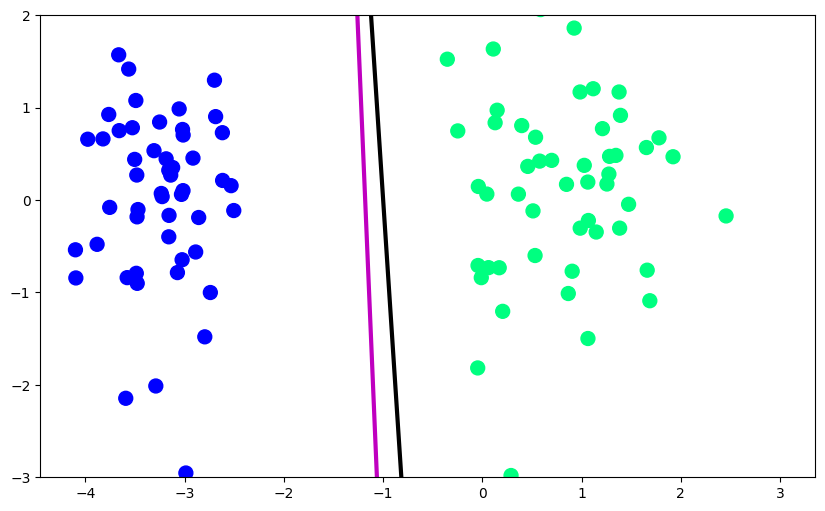

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input3,y_input3,color='m',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Softmax Regression (Multiclass Logistic Regression)

*Softmax Regression is nothing but Logistic Regression for 3 or more classes.
Whenever the target has multiple categories (not just Yes/No), we switch from Sigmoid to Softmax.*

 **Why Softmax?**

Logistic Regression works only for binary classification.
If we have more than two classes → use Softmax Regression.

It is also used as the last layer in many deep learning models.

 **Softmax Function (main formula)**

Softmax converts raw scores into probabilities.

* All probabilities are between 0 and 1

* And they add up to 1

Formula for class i:

![formula](https://miro.medium.com/v2/1*bol3L-WNVacCscvG-rlypQ.png)


This helps the model pick the class with highest probability.

**How Prediction Works**

* Model makes scores for each class

* Apply Softmax → get probabilities

* Pick class with highest probability

 **How Training Works**

Instead of training separate logistic models for each class, we train one single model using:

✔ Cross-Entropy Loss (multiclass version)

Cross-entropy measures how far the predicted probability is from the true class.

Lower cross-entropy → better learning.

Example:

>If 3 classes and 2 features → model learns 9 parameters (6 weights + 3 biases) in one go.

In [19]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
encoder= LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df= df[['sepal_length','petal_length','species']]

In [24]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [25]:
X= df.iloc[:,0:2]
y=df.iloc[:,-1]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
clf= LogisticRegression(multi_class= 'multinomial')

In [28]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [29]:
y_pred= clf.predict(X_test)

In [30]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [31]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [32]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [33]:
clf.predict(query)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


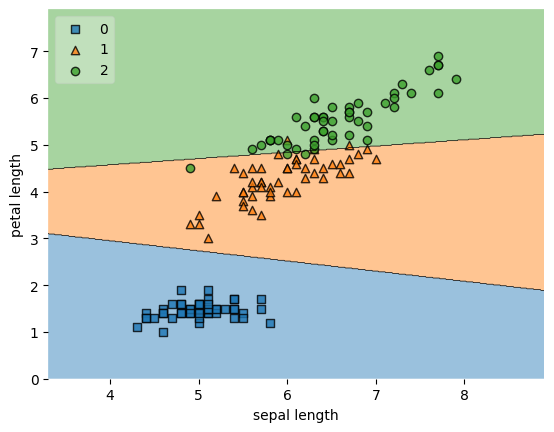

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf,legend=2)
plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.show()

For non-linear datasets, standard Logistic Regression performs poorly because it only draws a straight decision boundary.

> To fix this, you can use Polynomial Features to transform your input data (X) by adding new columns corresponding to higher-degree terms (like X2 orX3). This technique allows the Logistic Regression model to find a curved (polynomial) decision boundary. By transforming the features, you can significantly improve the model's accuracy on non-linear data compared to normal Logistic Regression. You should test different degrees to find the optimum value, as too high a degree can cause overfitting.

*if you want example of this you can tell me in comment*

## Logistic Regression Hyperparameter Tuning Guide

When initializing your Logistic Regression model, you can pass these parameters to customize how the model learns and handles your data:

### 1. Regularization (Controlling Overfitting)

Regularization techniques are applied by default in scikit-learn. These are vital for preventing overfitting, especially on noisy data.

| Parameter | Value Options | Purpose  |
| :--- | :--- | :--- |
| **penalty** | **'l1'**, **'l2'** (default), **'elasticnet'**, **'none'** | Determines the type of regularization used. If you select `'none'`, you run a normal Logistic Regression without any regularization applied. |
| **C** | Positive float (Default: 1.0) | This is the **inverse of regularization strength** ($\frac{1}{\lambda}$). **A smaller value of C (closer to zero) results in stronger regularization** and helps avoid overfitting. This is a critical parameter to tune. |
| **l1\_ratio** | Float between 0 and 1 | Only used if `penalty='elasticnet'` is selected. It controls the mixing ratio: **0** acts like pure L2 regularization, **1** acts like pure L1, and values between 0 and 1 mix both. |

### 2. Optimization and Stability

These parameters control the numerical algorithms (Gradient Descent solvers) that find the optimal coefficients ($W$):

| Parameter | Value Options | Purpose |
| :--- | :--- | :--- |
| **solver** | **'lbfgs'** (default), **'newton-cg'**, **'sag'**, **'saga'**, **'liblinear'** | Selects the specific optimization technique used. **The key constraint is compatibility:** your choice of `solver` must support your chosen `penalty`. For example, if you use `'elasticnet'`, you must select the `'saga'` solver. |
| **max\_iter** | Integer (Default: 100) | This is the number of **epochs** (cycles) the algorithm runs to converge (find the minimum loss),. If your model doesn't converge, you should increase this value. |
| **tol** | Float (Default: $1e-4$) | **Tolerance** is a stopping criteria for Gradient Descent. Generally, you don't change this much; instead, you focus on tuning `max_iter`. |

### 3. Handling Multi-Class and Imbalanced Data

If your problem is not simple binary classification, you need these options:

| Parameter | Value Options | Purpose |
| :--- | :--- | :--- |
| **multi\_class** | **'ovr'** (One-vs-Rest), **'multinomial'** (Softmax), **'auto'** | Use this if you have more than two output classes. **'ovr'** trains a separate Logistic Regression model for every class. **'multinomial'** (Softmax) trains a single model that calculates all coefficients simultaneously. You can often leave this set to **'auto'** for the best result. |
| **class\_weight** | **'balanced'**, or custom dictionary | Use `'balanced'` if you have an **imbalanced dataset** (where one class significantly dominates others). This weights the classes to give more importance to the minority class. |
| **n\_jobs** | Integer (e.g., **-1**) | Defines how many CPU cores to use. Setting it to **-1** instructs the model to use all available cores. This is highly useful for computationally expensive tasks like multi-class classification using OVR. |

*for more hyperparameter you check original documentation* [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

below you can tune hyperparameter and see changes

In [35]:
# Run this cell in a Jupyter / Kaggle / Colab notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider, IntSlider, FloatText, VBox, HBox, Label
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# ------------------------
# Dataset loader
# ------------------------
def load_dataset(dataset):
    if dataset == "Binary":
        X, y = make_blobs(n_features=2, centers=2, random_state=6)
    else:
        X, y = make_blobs(n_features=2, centers=3, random_state=2)
    return X, y

# ------------------------
# Meshgrid Drawer
# ------------------------
def draw_meshgrid(X, step):
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=step)
    b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=step)
    XX, YY = np.meshgrid(a, b)
    input_array = np.array([XX.ravel(), YY.ravel()]).T
    return XX, YY, input_array

# ------------------------
# Utility: validate solver/penalty combos
# ------------------------
def is_valid_combo(penalty, solver, multi_class):
    # Very conservative checks — sklearn has specific allowed combos, so we guard common invalid ones.
    if penalty == "elasticnet" and solver != "saga":
        return False, "elasticnet requires solver='saga'"
    if penalty == "l1" and solver not in ("liblinear", "saga"):
        return False, "l1 requires solver='liblinear' or solver='saga'"
    if penalty == "none" and solver == "liblinear":
        return False, "penalty='none' is not supported with solver='liblinear'"
    if multi_class == "multinomial" and solver == "liblinear":
        return False, "multi_class='multinomial' not supported with solver='liblinear'"
    return True, ""

# ------------------------
# Main interactive function
# ------------------------
def run_model(
    dataset="Binary",
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=100,
    multi_class="auto",
    l1_ratio=0.5,
    mesh_step=0.05,
    random_state=42
):
    X, y = load_dataset(dataset)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

    ok, msg = is_valid_combo(penalty, solver, multi_class)
    if not ok:
        print("Invalid parameter combination:", msg)
        print("Please change penalty / solver / multi_class to a valid combination.")
        return

    # Build kwargs safely for LogisticRegression
    lr_kwargs = dict(C=C, solver=solver, max_iter=max_iter, multi_class=multi_class, random_state=random_state)
    # Only include penalty and l1_ratio if appropriate
    if penalty == "none":
        lr_kwargs["penalty"] = "none"
    else:
        lr_kwargs["penalty"] = penalty

    if penalty == "elasticnet":
        lr_kwargs["l1_ratio"] = l1_ratio

    # Instantiate and fit (catch errors)
    try:
        clf = LogisticRegression(**lr_kwargs)
        clf.fit(X_train, y_train)
    except Exception as e:
        print("Model failed to train with this configuration:")
        print(e)
        return

    # Predict and plot
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    XX, YY, input_array = draw_meshgrid(X, mesh_step)
    try:
        labels = clf.predict(input_array)
    except Exception as e:
        print("Prediction on meshgrid failed:", e)
        return

    plt.figure(figsize=(7, 5))
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap='rainbow')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k')
    plt.title(f"Logistic Regression (Accuracy: {round(acc, 3)})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    # Show a few diagnostic prints
    print("Configuration:")
    print(f" penalty={penalty}, solver={solver}, C={C}, max_iter={max_iter}, multi_class={multi_class}, l1_ratio={l1_ratio if penalty=='elasticnet' else 'N/A'}")
    print("Train size:", X_train.shape, "Test size:", X_test.shape)
    print("Accuracy (test):", round(acc, 4))

# ------------------------
# Build widget controls 
# ------------------------
interact(
    run_model,
    dataset=Dropdown(options=["Binary", "Multiclass"], value="Binary", description="Dataset"),
    penalty=Dropdown(options=["l2", "l1", "elasticnet", "none"], value="l2", description="Penalty"),
    C=FloatSlider(value=1.0, min=0.01, max=5.0, step=0.01, description="C"),
    solver=Dropdown(options=["newton-cg", "lbfgs", "liblinear", "sag", "saga"], value="lbfgs", description="Solver"),
    max_iter=IntSlider(value=100, min=50, max=1000, step=50, description="Max Iter"),
    multi_class=Dropdown(options=["auto", "ovr", "multinomial"], value="auto", description="Multi-Class"),
    l1_ratio=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description="l1_ratio"),
    mesh_step=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description="mesh step"),
    random_state=IntSlider(value=42, min=0, max=9999, step=1, description="rnd state")
)


interactive(children=(Dropdown(description='Dataset', options=('Binary', 'Multiclass'), value='Binary'), Dropd…

<function __main__.run_model(dataset='Binary', penalty='l2', C=1.0, solver='lbfgs', max_iter=100, multi_class='auto', l1_ratio=0.5, mesh_step=0.05, random_state=42)>